### **Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files

### **Input Data**
load the training data file
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [2]:
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt


In [0]:
data = np.genfromtxt("data-nonlinear.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

iters = deque()
accuracys1 = deque()
accuracys2 = deque()
accuracys3 = deque()
accuracys4 = deque()
accuracys5 = deque()
train_costs1 = deque()
train_costs2 = deque()
train_costs3 = deque()
train_costs4 = deque()
train_costs5 = deque()
theta_datas1 = deque()
theta_datas2 = deque()
theta_datas3 = deque()
theta_datas4 = deque()
theta_datas5 = deque()
lambda_datas = deque()
#print(label[57])
#print(label[58])
#print(type(x))
#print(y_label0)
#print(type(x_label0))
#print(len(x)) #118
#print(y)
#print(label)
#print(len(x_label0)) #60
#print(len(x_label1)) #58

### **Logistic Regression**
1) non-Linear Model
<br>
$\ z =  g(x, y; \theta) = \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j} x^{i} y^{j}$  
$\sigma(z) = \frac{1}{1 + \exp(-z)}$
<br>  
2) Objective Function
<br>
$J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta))) \right] + \frac{\lambda}{2} \sum_{i=0}^{9} \sum_{j=0}^{9} \theta_{i,j}^2$
<br>  
3) Gradient Descent
<br>
$\theta_{i, j}^{(t+1)} = \theta_{i, j}^{(t)} - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta^{(t)})) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{i, j}} + \lambda \theta_{i, j}^{(t)} \right]$, for all $i, j$  
<br>
4) HyperParameters Setting
<br>
$\ lr = 1*10^{-3}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + np.exp(-z))
  return result

In [0]:
def gFunction(x_data, y_data, theta_data):  #단일 x,y와 모든 theta 계산
  result = 0
  for i in range(0, 10):
    for j in range(0, 10):
      result += theta_data[i][j] * np.power(x_data, i) * np.power(y_data, j)
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_data, lambda_data):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = gFunction(x_data[i], y_data[i], theta_data)
    estimate = sigmoidFunction(estimate)
    #print(estimate)
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log(estimate)) - (1-class_data[i])*np.log(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118                          #data fidelity term
  cost += lambda_data / 2 * np.sum(np.square(theta_data))   #regularization term
  #print("Cost출력",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_data, lambda_data):
  lr = 3e-1
  for i in range(0, 10):
    for j in range(0, 10):
      estimate = 0
      for k in range(0, 118):
        estimate += (sigmoidFunction(gFunction(x_data[k], y_data[k], theta_data)) - class_data[k]) * np.power(x_data[k],i) * np.power(y_data[k],j)
      theta_data[i][j] -= lr * (estimate/118 + lambda_data * theta_data[i][j])
  return theta_data

In [0]:
def main():
  theta_data = np.zeros([10,10])  #Initialization
  
  for iter in range(0, 250):    
    lambda_data = 0.00001
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs1.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys1.append(accuracy)
    iters.append(iter)
    theta_datas1.append(theta_data)
    lambda_datas.append(lambda_data)

  ## 2번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 250):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys2.append(accuracy)

    lambda_data = 0.01
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs2.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas2.append(theta_data)
    lambda_datas.append(lambda_data)

  ## 3번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 250):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys3.append(accuracy)

    lambda_data = 1
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs3.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas3.append(theta_data)
    lambda_datas.append(lambda_data)

if __name__ == "__main__":
  main()

### **1. Plot the training data**

Plotting the training data


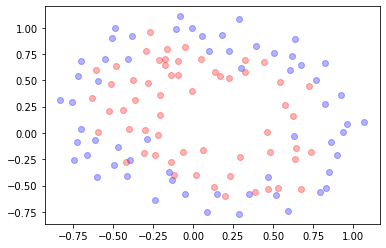

In [9]:
print("Plotting the training data")
plt.figure()
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

### **2. Plotting the Training Error with Regularizations**

Plotting the Training Error


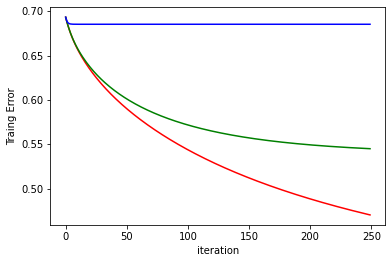

In [10]:
print("Plotting the Training Error")
plt.plot(iters, train_costs1, 'r')
plt.plot(iters, train_costs2, 'g')
plt.plot(iters, train_costs3, 'b')
plt.xlabel('iteration')
plt.ylabel('Traing Error')
plt.show()

### **3. Displaying the values of the chosen Regularizations**

In [11]:
lambda1 = lambda_datas[0]
lambda2 = lambda_datas[1]
lambda3 = lambda_datas[2]
print("lambda1 :\033[31m",lambda1,"\033[0m")
print("lambda2 :\033[32m",lambda2,"\033[0m")
print("lambda3 :\033[34m",lambda3,"\033[0m")

lambda1 : 1e-05 
lambda2 : 1e-05 
lambda3 : 1e-05 


### **4. Plotting the Training Accuracy with Regularizations**

Plotting the Training Accuracy


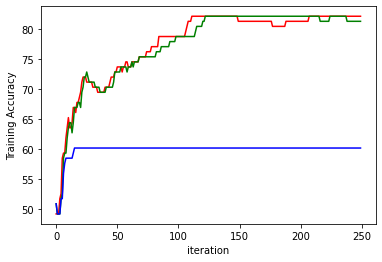

In [12]:
print("Plotting the Training Accuracy")
plt.plot(iters, accuracys1, 'r')
plt.plot(iters, accuracys2, 'g')
plt.plot(iters, accuracys3, 'b')
plt.xlabel('iteration')
plt.ylabel('Training Accuracy')
plt.show()

### **5. Final Training Accuracy with Regularizations**

In [13]:
print("Final Training Accuracy :\033[31m",accuracys1[-1],"% \033[0m")
print("Final Training Accuracy :\033[32m",accuracys2[-1],"% \033[0m")
print("Final Training Accuracy :\033[34m",accuracys3[-1],"% \033[0m")

Final Training Accuracy : 82.20338983050848 % 
Final Training Accuracy : 81.35593220338984 % 
Final Training Accuracy : 60.16949152542372 % 


### **6. Plotting the Optimal Classifer superimposed on the Training Data**

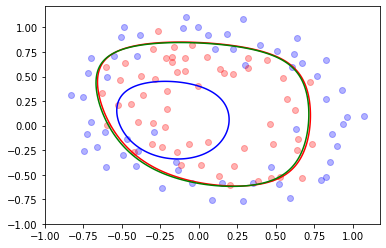

In [15]:
theta_1 = theta_datas1[-1]
theta_2 = theta_datas2[-1]
theta_3 = theta_datas3[-1]

Xmesh, Ymesh = np.meshgrid(np.linspace(-1.0, 1.0, 300), np.linspace(-1.0, 1.0, 300))

Z1 = gFunction(Xmesh, Ymesh, theta_1)
Z2 = gFunction(Xmesh, Ymesh, theta_2)
Z3 = gFunction(Xmesh, Ymesh, theta_3)

fig = plt.figure()
levels = [0]
graph1 = plt.contour(Xmesh, Ymesh, Z1, levels, colors = 'red')
graph2 = plt.contour(Xmesh, Ymesh, Z2, levels, colors = 'green')
graph3 = plt.contour(Xmesh, Ymesh, Z3, levels, colors = 'blue')
graph4 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
graph5 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()